In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
from sklearn.linear_model import LinearRegression as lr
import statsmodels.formula.api as smf

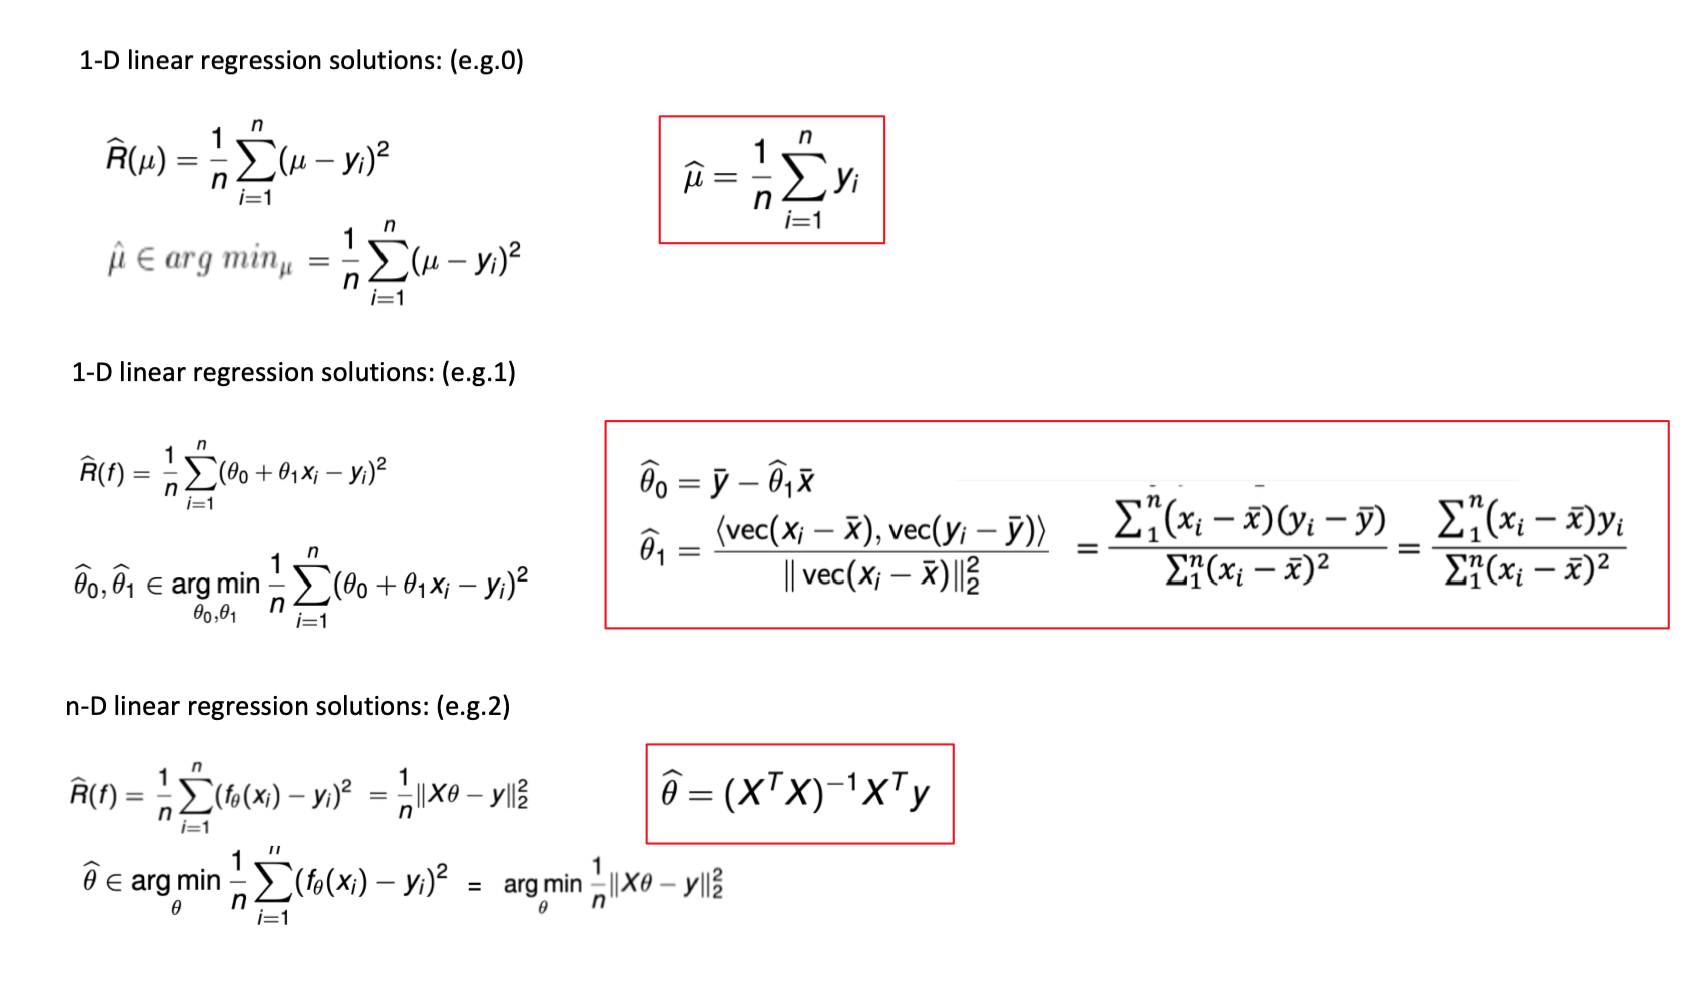

# OLS  (ordinary least squares) 普通最小二乘法

- definition of least-squares problem (P358 *linear algebra*)

    find an vector $\mathbf{\theta}$ that makes $\left\|\mathbf{y}-X\mathbf{\theta} \right\|$ as small as possible.

    the name of "least-squares" arises from that $l_2$ norm is square root of a sum of squares.

    - $l_2$ norm of vector $\mathbf{\beta}$: $$\left \| \beta \right \|_2=\sqrt{\sum_{j=1}^p  \beta_{(j)} ^2}$$

- geomatric interpretation

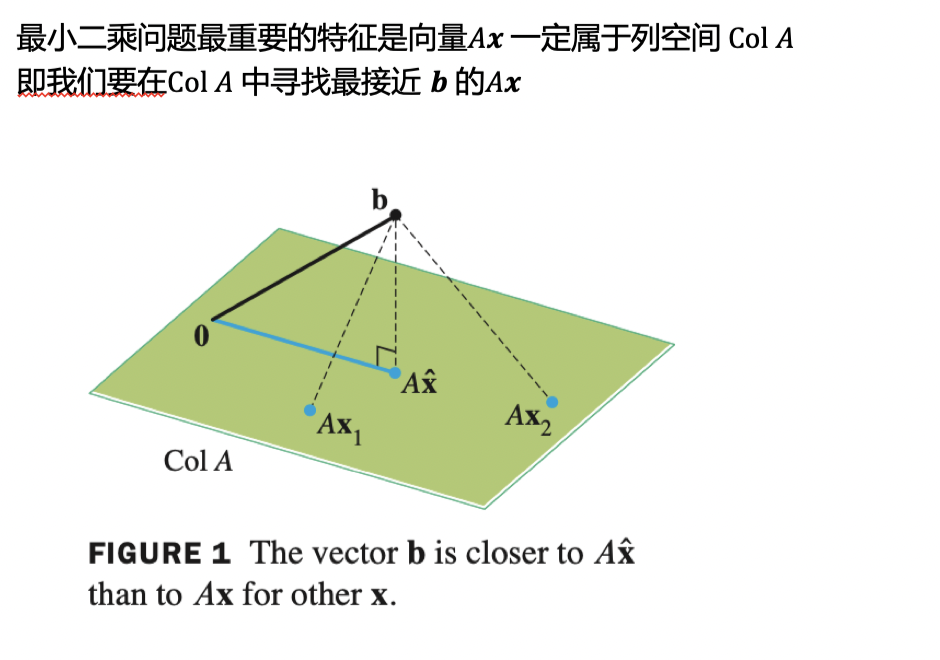

for linear regression: 

$$
y=X\theta +w,\ \theta\in \mathbb{R}^{2},\ X\in \mathbb{R}^{n\times 2}
$$

OLS solution is to find

$$
\hat \theta=\arg \min _{\theta} \left \| X\theta - y \right \|_{2}^{2}
$$

estimated error

$$
e = y-\hat y
$$

in geometric interpretation, we find $X\hat \theta$ in $Col\ X$

where $Col\ X$ is the column space of matrix $X$, which is spanned by 2 columns of $X$

$$
Col\ X=Span\left \{ X_{:1}, X_{:2}\right \}
$$

the OLS solution is to make sure 

$$
e\perp Col\ X
$$

in this case, vector $\hat y$ is the orthogonal projection of vector $y$ in $Col\ X$

so that $e$ is the shortest distance between vector $y$ and vector $\hat y$

# solving using OLS and MSE

- linear regression: 1D constant x, 1D, n-D

- non-linear regression

# linear regression

**meaning of weight $\theta$**: how much a change in input will affect change in output

e.g., if I add a bedroom to my house, how much my house price will change?

## simple regression (1D) with constant x

Data:

- $\mathbf{x} \in \mathbb{R}^n$ is a constant vector, $x_{i} = 1\ ∀\ i$ (for all i)

- $\mathbf{y} \in \mathbb{R}^n$, $y_{i}$ = height of person $i$

Function class: constant function $F = \left \{ f:R \mapsto  R\ |f(x) = \mu, \forall x \right \}$

goal: using OLS to find parameter $\mu$

- we want to find the parameter $\hat \mu$ that minimizes empirical risk (MSE) 

$$
\hat R(\mu) = \frac{1}{n}\sum_{i=1}^n (\mu - \mathbf{y_i})^2
$$

$$
\hat \mu = \underset{\mu}{\arg\min}\sum_{i=1}^n (\mu - \mathbf{y_i})^2
$$

- define function $f(\mu)=\sum_{i=1}^n (\mu - \mathbf{y_i})^2$

- set derivative of function $f(\mu)$ to 0 to get $\hat \mu$

$$
\frac{df(\mu)}{d\mu} = \sum_{i=1}^n (\mu - \mathbf{y_i})
$$

$$
\hat \mu = \bar{\mathbf{y}} = \frac{1}{n}\sum_{i=1}^n \mathbf{y_i}
$$

#### line plot of MSE vs. $\hat y$

Text(0.5, 1.0, 'Optimal solution is mean of samples')

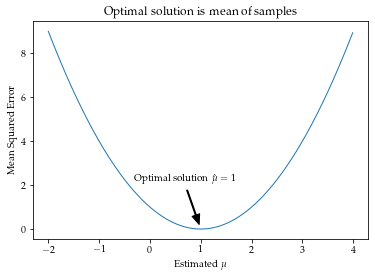

In [5]:
n = 100  # sample size
mustar = 1 # true mean
noise = np.random.randn(n)   # random noise
y = mustar + noise           # n samples drawn from standard normal distribution N(0, 1)

muhat = np.mean(y) # estimated mean

e = muhat - mustar # estimation error

yhat = np.arange(-2, 4, 0.01)

risk = np.zeros_like(yhat)

for i, yi in enumerate(yhat):
    risk[i] = np.mean((yi - mustar)**2)

fig, ax = plt.subplots()

ax.annotate(text=r'Optimal solution $\hat{\mu}=1$', xy=(1, 0), xycoords='data',
            xytext=(0.3, 0.3), textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(width=1, headlength=10, headwidth=8, facecolor='black', shrink=0.1))

plt.plot(yhat, risk, linewidth=1)

plt.xlabel("Estimated $\mu$")

plt.ylabel("Mean Squared Error")

plt.title('Optimal solution is mean of samples')


#### Error

$$error\ e = \hat{\mu }-\mu^{*}$$

#### error e has a Gaussian distribution

Text(0.5, 0.98, 'Distribution of Error is Normal')

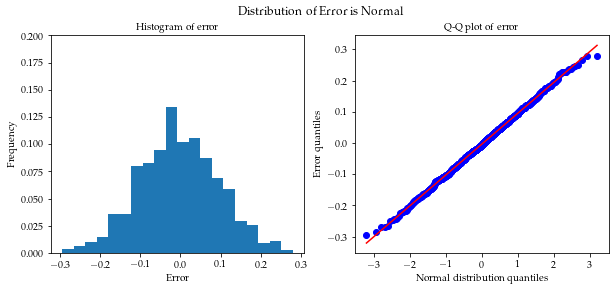

In [26]:
import scipy.stats as st

TRIALS=1000
n=100 
mustar = 1
y = mustar + np.random.randn(n,TRIALS) # y is a 100*1000 matrix
muhat = np.mean(y,axis=0) # compute mean by column, muhat is a 1*1000 row vector
e = muhat - mustar      # error

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(e, weights=np.ones_like(e) / len(e), bins=20)
axs[0].set_ylim(0, 0.2)
axs[0].set_xlabel('Error', fontsize=10)
axs[0].set_ylabel('Frequency', fontsize=10)
axs[0].set_title('Histogram of error', fontsize=10)

st.probplot(e, dist='norm', plot=plt)
axs[1].set_xlabel('Normal distribution quantiles', fontsize=10)
axs[1].set_ylabel('Error quantiles', fontsize=10)
axs[1].set_title('Q-Q plot of error', fontsize=10)

fig.suptitle('Distribution of Error is Normal')

#### squared error $e^{2}$ decrease as $n$ increase

As the number of trials increase, the average squared error decrease to 0

average squared error  $\bar{e^{2}}=\frac{1}{n}\sum \left ( \bar{y}-\mu ^{*} \right )^{2}$

##### squared error vs. # trial plot

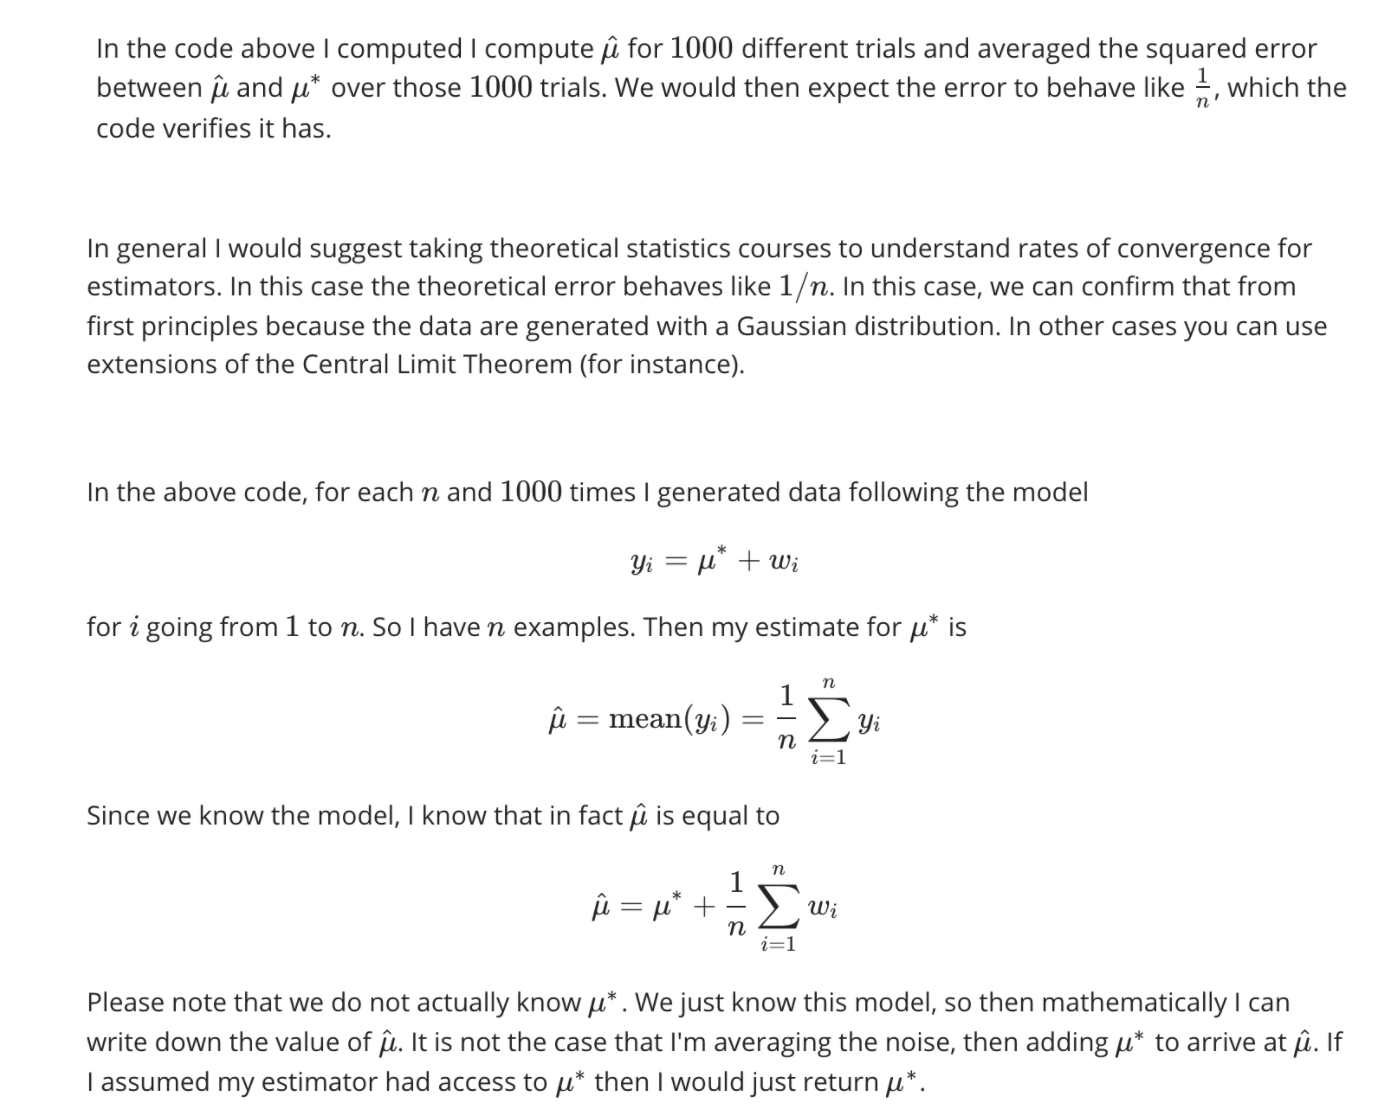

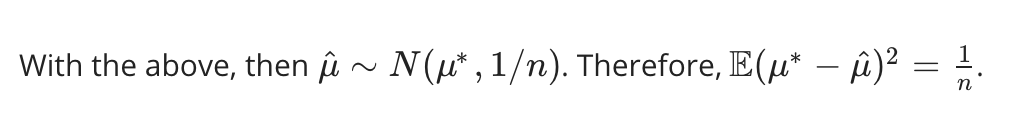

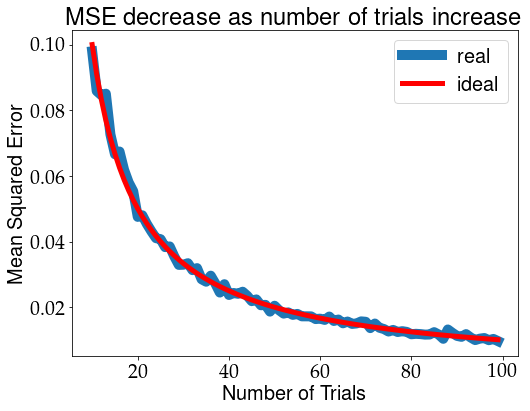

In [ ]:
nseq = np.arange(10,100,1)  # create an array of number of trials n=10~99, step = 1, shape (90, )
TRIALS = 1000   # number of trials
mustar = 1 # true mean
average_squared_error_n = np.zeros(nseq.shape)
for i, n in enumerate(nseq): # enumerate outputs both the thing I wish to loop over and a counter
    average_squared_error_n[i] = np.mean((np.mean(mustar + np.random.randn(n,TRIALS),axis=0)-mustar)**2)

plt.plot(nseq, average_squared_error_n,linewidth=10, label='real')  # blue line: real average_squared_error of 1000 trials
plt.plot(nseq, 1/nseq ,color='red',linewidth=5, label='ideal')   # red line: ideal average_squared_error of infinite trials

plt.xlabel("Number of Trials")
plt.ylabel("Mean Squared Error")
plt.title('MSE decrease as number of trials increase')
plt.legend()
plt.show()

#### log-log plot

slope is nearly -1

Text(0, 0.5, 'log Mean Squared Error')

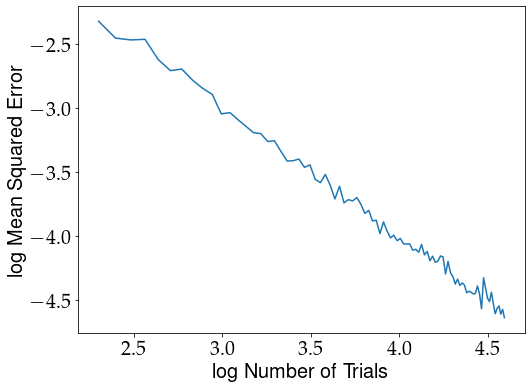

In [ ]:
plt.plot(np.log(nseq),np.log(average_squared_error_n))
plt.xlabel("log Number of Trials")
plt.ylabel("log Mean Squared Error")

## simple linear regression (1D)

Data:

- $\mathbf{x} \in \mathbb{R}^n$ is a vector

- $\mathbf{y} \in \mathbb{R}^n$, $y_{i}$ = height of person $i$

Function class: linear function $F = \left \{ f:R \mapsto  R\ |f(x) = \theta_0 + \theta_1 x\right \}$

goal: using OLS to find parameter $\theta_0$ and $\theta_1$

- we want to find the parameter $\hat \theta_0$ and $\hat \theta_1$ that minimizes empirical risk (MSE)

$$
\hat R(\theta_0, \theta_1) = \frac{1}{n}\sum_{i=1}^n (\theta_0 + \theta_1 \mathbf{x_i} - \mathbf{y_i})^2
$$

$$
\hat \theta_0, \hat \theta_1 = \underset{\hat \theta_0, \hat \theta_1}{\arg\min}\sum_{i=1}^n (\mu - \mathbf{y_i})^2
$$


- Solution 1: set derivative of function $f(\theta_0, \theta_1)=\sum_{i=1}^n (\mu - \mathbf{y_i})^2$ to 0

- Solution 2: linear algebra

$\hat{\theta}_0$ is dependent of $\hat{\theta}_1$ while $\hat{\theta}_1$ is independent on $\hat{\theta}_0$

$$
\hat{\theta}_0 = \bar{\mathbf{y}}- \hat{\theta}_1 \bar{\mathbf{x}}
$$

$$
\hat{\theta}_1 = \frac{\sum_{i=1}^n (\mathbf{x_i}-\bar{\mathbf{x}}) (\mathbf{y_i}-\bar{\mathbf{y}})}{\sum_{i=1}^n (\mathbf{x_i}-\bar{\mathbf{x}})^2} = \frac{\sum_{i=1}^n (\mathbf{x_i}-\bar{\mathbf{x}}) \mathbf{y_i}}{\sum_{i=1}^n (\mathbf{x_i}-\bar{\mathbf{x}})^2}
$$

### Surface plot and contour plot of MSE vs. $\hat{\theta}$

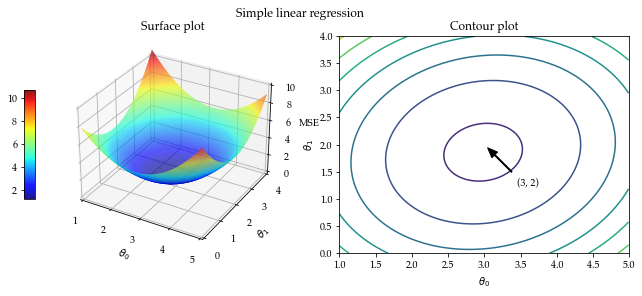

In [26]:
def loss(theta):
    """Returns MSE of sample using a pair of $theta$ estimation
        theta: 2d numpy array [theta0, theta1]
    """
    return np.mean((theta[0] + theta[1] * x - y)**2)

n = 100  # sample size
noise = np.random.randn(n)   # random noise (n, )
x = np.random.randn(n)          # x (n, )
y = 2 * x + 3 + noise           # y (n, )

xgrid = np.mgrid[1:5:0.01, 0:4:0.01]
xvec = xgrid.reshape(2, -1).T
MSE = np.vstack([loss(xi) for xi in xvec]).reshape(xgrid.shape[1:])

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.35))

# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

surf = ax.plot_surface(xgrid[0], xgrid[1], MSE, rstride=1, cstride=1,
                cmap=plt.cm.jet, shade=True, alpha=0.9, linewidth=0)

ax.set(xlim=(1, 5), ylim=(0, 4), zlim=(0, 10),
       xlabel=r'$\theta_0$', ylabel=r'$\theta_1$', zlabel='MSE')

ax.set_title("Surface plot")
fig.colorbar(surf, shrink=0.5, aspect=10,location='left')

# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)
ax.contour(xgrid[0], xgrid[1], MSE)

ax.set(xlim=(1, 5), ylim=(0, 4),
       xlabel=r'$\theta_0$', ylabel=r'$\theta_1$')

ax.annotate(text='(3, 2)', xy=(3, 2), xycoords='data',
            xytext=(0.65, 0.35), textcoords='axes fraction',
            va='top',ha='center',
            arrowprops=dict(width=1, headlength=10, headwidth=8, facecolor='black', shrink=0.1))

ax.set_title("Contour plot")
fig.suptitle('Simple linear regression')
plt.show()

## multiple linear regression

Data:

- $\mathbf{X} \in \mathbb{R}^{n \times d}$ is a matrix, $\mathbf{X_i} \in \mathbb{R}^{d}$, assume $\mathbf{X}_{i,1}=1$ for any $i$

- $\mathbf{y} \in \mathbb{R}^n$, $y_{i}$ = height of person $i$

Function class: linear function $F = \left \{ f: \mathbb{R}^{d} \mapsto  \mathbb{R}\ |f(x) = \mathbf{X}\mathbf{\theta}= \sum_{j=1}^d \mathbf{\theta_j} \mathbf{X_j}  \right \}$

goal: using OLS to find parameter $\mathbf{\theta}\in \mathbb{R}^{d}$

Solution: 

$$
\hat{\mathbf{\theta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$

- **weighted least square** solution of $L(\theta)=\left \| D^{\frac{1}{2}}X\theta-\mathbf{y} \right \|_{2}^{2}$

$$\hat \theta = (X^TDX)^{-1}X^TDy$$

- $d=1$, function is a line

- $d=2$, function is a plane

- $d>2$, function is a hyperplane

- we want to find the parameter $\mathbf{\theta}$ that minimizes empirical risk (MSE)

$$
\hat R(\mathbf{\theta}) =\frac{1}{n}\left\| \mathbf{X}\mathbf{\theta} - \mathbf{y}\right\|^2 = \frac{1}{n}\sum_{i=1}^n (\sum_{j=1}^d \mathbf{\theta_j} \mathbf{X_j} - \mathbf{y_i})^2
$$

$$
\hat{\mathbf{\theta}} = \underset{\mathbf{\theta}}{\arg\min}\sum_{i=1}^n (\sum_{j=1}^d \mathbf{\theta_j} \mathbf{X_j} - \mathbf{y_i})^2
$$


- Solution 1: set derivative of function $f(\mathbf{\theta})=\sum_{i=1}^n (\sum_{j=1}^d \mathbf{\theta_j} \mathbf{X_j} - \mathbf{y_i})^2$ to 0

    solve $d+1$ variables by $d+1$ equations

- Solution 2: linear algebra

$$
\hat{\mathbf{\theta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$

$(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$ is Moore-Penrose pseudoinverse

- issues

    - $\mathbf{X}^T\mathbf{X}$ invertibility

    - $O(p^3)$ time complexity

    - MSE is sensitive to noise/outliers while MAD not

1. set gradient of empirical risk function to 0

    $$
    \hat{\mathbf{\theta}} = \underset{\mathbf{\theta}}{\arg\min}\hat{R}(\mathbf{\theta})\Leftrightarrow \nabla \hat{R}(\hat{\mathbf{\theta}})=0
    $$
    
    1D convex function and 2D bowl shape functions only has one optimal solution, i.e., local optimal = global optimal
    
    
2. gradient descent

### squared error decreases as sample size increase

- squared error $\left\| \hat{\beta}-\beta^* \right\|$ behaves as $\frac{p}{n}$

$$
\ln(e) = \ln(p) - \ln(n)
$$

- error decreases as sample size $n$ increase

- for a fixed sample size, error becomes smooth if average over many trials

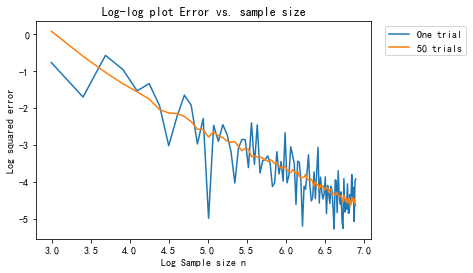

In [ ]:
def error(n: int) ->float:
    """Returns squared error between estimated coefficient and true coefficient
       n: sample size
    """
    signoise=1
    p = 10     # number of features
    X = np.random.randn(n,p)         # feature matrix shape: (n, p)
    betastar = np.random.randn(p)    # true coefficient
    y = X @ betastar + signoise * np.random.randn(n)  # response
    betahat = lr(fit_intercept=False).fit(X, y).coef_   # estimated coefficient

    return np.linalg.norm(betahat - betastar)**2


nrange = np.arange(20, 1000, 10)   # sample size

TRIAL = 50

errors = np.array([error(n) for n in nrange]) 

meanerrors = [np.mean([error(n) for _ in range(TRIAL)]) for n in nrange]

plt.plot(np.log(nrange),np.log(errors), label="One trial")

plt.plot(np.log(nrange),np.log(meanerrors), label=f"{TRIAL} trials")

plt.xlabel("Log Sample size n")

plt.ylabel("Log squared error")

plt.title("Log-log plot Error vs. sample size")

plt.legend(bbox_to_anchor=(1.3, 1))

# linear regression use `statsmodel's OLS`

`mod = ols(formula='Income ~ Education+1', data=df)`

or `mod = ols(df['Income'], df['Education'], missing = "none")`

`y`:A 1-d response variable (dependent).

`X`: A n x d matrix, n is the number of observations and d is the number of regressors/predictors/independent variables. 

**An intercept is not included by default and should be added by the user.**

`-1`: remove intercept

`+1` : add intercept

`missing` : str

Available options are 'none', 'drop', and 'raise'. 

Default is 'none'.

If 'none', no nan, checking is done. 

If 'drop', any observations with nans are dropped.

If 'raise', an error is raised. 

In [ ]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='Income ~ Education+1', data=df)

res=mod.fit() # result

res.summary() #diagnostics

res.rsquared # R squared, Percentage of variation in y that can be explained by x

# Sum of squared of total
SST = np.sum((np.mean(df['Income']) - df['Income'])**2)

# Sum of squared of error
SSE = np.sum((res.predict(df['Education']) - df['Income'])**2)

# Sum of square of regression
SSR = np.sum((res.predict(df['Education'])-np.mean(df['Income']))**2)

# calculate R squared by formula: SSR/SST
rsquared = SSR/SST

# same as model result
np.isclose(rsquared, res.rsquared)

res.bse ##standard errors

## income dataset

Text(0, 0.5, 'Income')

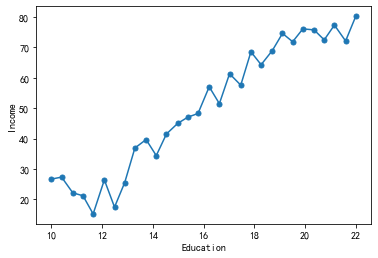

In [12]:
leadstring = '/Users/wenxinxu/Desktop/SDS565/data/income/'

df = pd.read_csv(leadstring + 'Income1.csv',index_col=0)

dfall = pd.read_csv(leadstring + 'Income2.csv',index_col=0)

# plot data points
plt.plot(df.Education, df.Income,marker='.',markersize=10)
plt.xlabel('Education')
plt.ylabel('Income')

# # another way to plot data points
# fig, ax1 = plt.subplots()
# ax1.set_ylabel('Income')
# df.plot(x='Education',y='Income',marker='.',linestyle='',legend=False,figsize=(15,9),ax=ax1,markersize=20)

In [13]:
df.head(n=10)

,Education,Income
1,10.000000,26.658839
2,10.401338,27.306435
3,10.842809,22.132410
4,11.244147,21.169841
5,11.645485,15.192634
6,12.086957,26.398951
7,12.488294,17.435307
8,12.889632,25.507885
9,13.290970,36.884595
10,13.732441,39.666109


In [14]:
dfall.head(n=10)

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922
6,18.275862,26.206897,71.504485
7,19.931034,150.344828,87.970467
8,21.172414,82.068966,79.811030
9,20.344828,88.275862,90.006327
10,10.000000,113.103448,45.655529


## linear regression and log linear regression

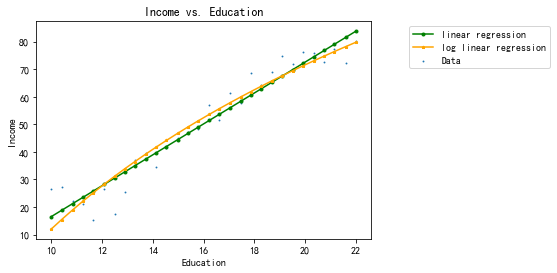

In [ ]:
mod_linear = smf.ols(formula='Income ~ Education+1', data=df).fit()
mod_loglinear = smf.ols(formula='Income ~ np.log(Education)+1', data=df).fit()

plt.scatter(df.Education, df.Income, marker='.', s=3, label='Data')

plt.plot(df.Education,mod_linear.predict(df),marker='o',markersize=3,linestyle='-', color='green', label='linear regression')

plt.plot(df.Education,mod_loglinear.predict(df),marker='*',markersize=3,linestyle='-', color='orange', label='log linear regression')

plt.legend(bbox_to_anchor=(1.1, 1))
plt.xlabel('Education')
plt.ylabel("Income")
plt.title("Income vs. Education")
plt.show()

### linear regression result

In [19]:
mod_linear.summary() #diagnostics

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     377.6
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           8.63e-18
Time:                        15:40:05   Log-Likelihood:                -93.500
No. Observations:                  30   AIC:                             191.0
Df Residuals:                      28   BIC:                             193.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.4463      4.725     -8.349      0.000     -49.125     -29.768
Education      5.5995      0.288     19.431      0.000       5.009       6.190
==============================================================================
Omnibus:                        1.166   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.774
Skew:                          -0.391   Prob(JB):                        0.679
Kurtosis:                       2.916   Cond. No.                         75.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

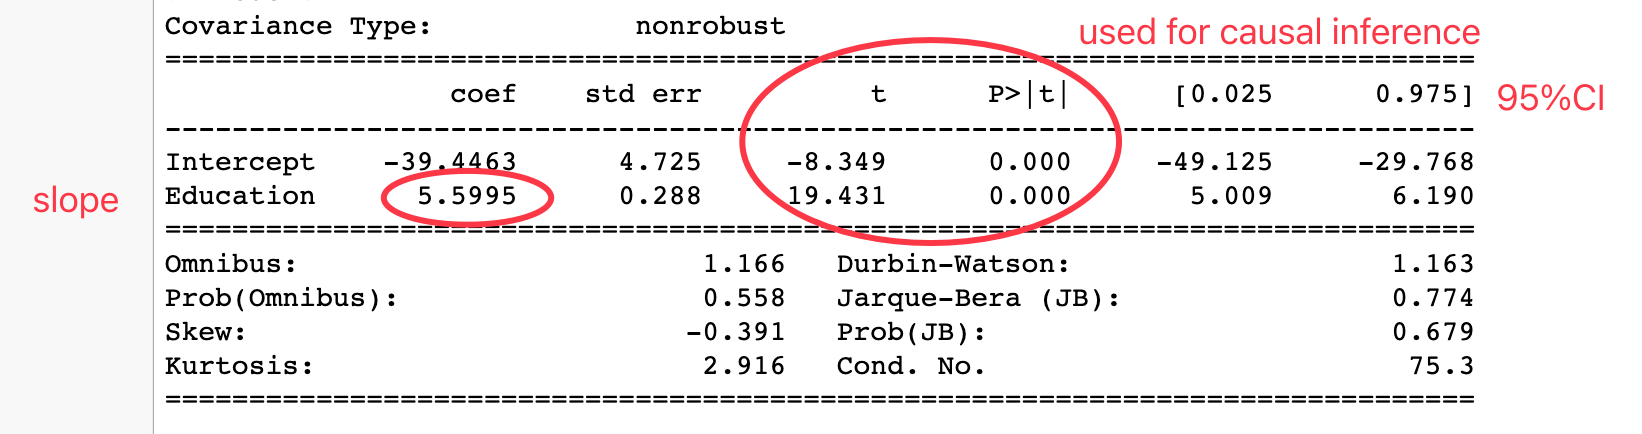

### log linear regression result

In [25]:
mod_loglinear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     377.6
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           8.63e-18
Time:                        15:46:23   Log-Likelihood:                -93.500
No. Observations:                  30   AIC:                             191.0
Df Residuals:                      28   BIC:                             193.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.4463      4.725     -8.349      0.000     -49.125     -29.768
Education      5.5995      0.288     19.431      0.000       5.009       6.190
==============================================================================
Omnibus:                        1.166   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.774
Skew:                          -0.391   Prob(JB):                        0.679
Kurtosis:                       2.916   Cond. No.                         75.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## linear regression of crazy data points

R squared = 0.002, means little linear relationship between `random` data and `Income`

In [ ]:
df['random']=np.random.randn(df.shape[0])
df.head()

,Education,Income,random
1,10.000000,26.658839,-0.055597
2,10.401338,27.306435,-0.282035
3,10.842809,22.132410,-0.555025
4,11.244147,21.169841,0.838698
5,11.645485,15.192634,-0.264354


In [34]:
res = smf.ols(formula='Income ~ random-1', data=df).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.082
Model:                            OLS   Adj. R-squared (uncentered):              0.050
Method:                 Least Squares   F-statistic:                              2.576
Date:                Mon, 06 Mar 2023   Prob (F-statistic):                       0.119
Time:                        15:52:47   Log-Likelihood:                         -161.12
No. Observations:                  30   AIC:                                      324.2
Df Residuals:                      29   BIC:                                      325.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
random        19.0638     11.877      1.605      0.119      -5.228      43.356
==============================================================================
Omnibus:                        1.038   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.845
Skew:                          -0.083   Prob(JB):                        0.655
Kurtosis:                       2.195   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### linear regression of more crazy data points

In [36]:
df['crazy'] = df['random']-(df['random']@df['Income'])*df['Income']/np.sum(df['Income']**2)

res = smf.ols(formula='Income ~ crazy-1', data=df).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.034
Method:                 Least Squares   F-statistic:                              0.000
Date:                Mon, 06 Mar 2023   Prob (F-statistic):                        1.00
Time:                        15:53:15   Log-Likelihood:                         -162.39
No. Observations:                  30   AIC:                                      326.8
Df Residuals:                      29   BIC:                                      328.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crazy       6.661e-16     12.933   5.15e-17      1.000     -26.450      26.450
==============================================================================
Omnibus:                       11.353   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                2.561
Skew:                          -0.145   Prob(JB):                        0.278
Kurtosis:                       1.598   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R squared is 0

In [37]:
# calculate R squared by formula
# because R squared can't <0. R squared in res.summary showed 0
# means no linear relationship between crazy data and income 
1-np.sum( (res.predict(df) - (df['Income']))**2)/np.sum( (df['Income'] - np.mean(df['Income']))**2)

-5.819864869480584

## 2D linear regression

In [38]:
import statsmodels.api as sm

# no intercept is be added
res = sm.OLS(dfall['Income'],dfall[['Education','Seniority']]).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              376.4
Date:                Mon, 06 Mar 2023   Prob (F-statistic):                    5.83e-21
Time:                        16:01:44   Log-Likelihood:                         -119.29
No. Observations:                  30   AIC:                                      242.6
Df Residuals:                      28   BIC:                                      245.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Education      3.2099      0.288     11.148      0.000       2.620       3.800
Seniority      0.1336      0.045      3.001      0.006       0.042       0.225
==============================================================================
Omnibus:                        4.630   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                1.924
Skew:                          -0.250   Prob(JB):                        0.382
Kurtosis:                       1.864   Cond. No.                         13.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# address categorical variables in linear regression

## statsmodels will automatically treat string or integer as a categorical variable

In [50]:
# create a dataset with categorical variable 'newcolumn' 
df = pd.DataFrame(np.random.randn(20,2), columns=['a', 'b'])

# convert numerical value to integer
df['newcolumn'] = df['b'].astype('int')

# drop column "1", axis=0 for row, axis=1 for column
df = df.drop(['b'],axis=1)

df['label']= df @ np.array([1,2]) + np.random.randn(20)*0.1

df.head(10)

,a,newcolumn,label
0,-1.759191,0,-1.737849
1,-0.041257,-1,-2.169438
2,1.390501,0,1.155661
3,0.328328,-1,-1.599926
4,2.296215,0,2.392000
5,1.572046,0,1.683698
6,-1.171624,0,-1.123484
7,0.845187,1,2.906440
8,-1.375253,0,-1.344110
9,0.234524,1,2.064239


In [51]:
res = sm.OLS(df['label'],df.iloc[:,:-1]).fit()
# res = smf.ols('label ~ a + newcolumn-1',data=df).fit() # same

res.summary() # result only has 2 variable: 0, newcolumn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  label   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              2787.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):                    3.71e-23
Time:                        17:59:46   Log-Likelihood:                          18.963
No. Observations:                  20   AIC:                                     -33.93
Df Residuals:                      18   BIC:                                     -31.93
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a              0.9974      0.020     50.243      0.000       0.956       1.039
newcolumn      1.9765      0.035     56.549      0.000       1.903       2.050
==============================================================================
Omnibus:                        2.220   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.706
Skew:                          -0.691   Prob(JB):                        0.426
Kurtosis:                       2.627   Cond. No.                         1.76
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## force statsmodel to treat categorical variable as categorical

use `C(column_name)`, C means categorical

In [62]:
res = smf.ols('label ~ a + C(newcolumn)-1',data=df).fit()

# convert newcolumn to categorical variable generate 2 new features: C(newcolumn)[-1], C(newcolumn)[0], C(newcolumn)[1]	
res.summary()

# convert categorical variables 'newcolumn' to dummy variables
dfdummy = pd.concat((df,
            pd.get_dummies(df['newcolumn'],
            prefix='newcolumn',drop_first=False)),axis=1).drop('newcolumn',axis=1)

res = sm.OLS(dfdummy['label'],dfdummy.drop('label',axis=1)).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1822.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.75e-20
Time:                        18:08:50   Log-Likelihood:                 19.985
No. Observations:                  20   AIC:                            -31.97
Df Residuals:                      16   BIC:                            -27.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
C(newcolumn)[-1]    -2.0242      0.051    -39.979      0.000      -2.132      -1.917
C(newcolumn)[0]      0.0005      0.029      0.016      0.988      -0.061       0.061
C(newcolumn)[1]      1.9294      0.050     38.343      0.000       1.823       2.036
a                    1.0035      0.021     48.818      0.000       0.960       1.047
==============================================================================
Omnibus:                        4.302   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                2.526
Skew:                          -0.844   Prob(JB):                        0.283
Kurtosis:                       3.422   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## convert categorical variables to dummy variables

dummy variable(one-hot encoding): expand a k-categories variable to a k dimentional vector

use `pd.get_dummies()`

`prefix='newcolumn'` means how to name new feature

`drop first`: new columns work as intercept, not independent

    Whether to get k-1 dummies out of k categorical levels by removing the first level.

In [68]:
dfdummy = pd.concat((df,
               pd.get_dummies(df['newcolumn'],prefix='newcolumn',drop_first=False)),axis=1).drop('newcolumn',axis=1)

dfdummy.head(10)

,a,label,newcolumn_-1,newcolumn_0,newcolumn_1
0,-1.759191,-1.737849,0,1,0
1,-0.041257,-2.169438,1,0,0
2,1.390501,1.155661,0,1,0
3,0.328328,-1.599926,1,0,0
4,2.296215,2.392000,0,1,0
5,1.572046,1.683698,0,1,0
6,-1.171624,-1.123484,0,1,0
7,0.845187,2.906440,0,0,1
8,-1.375253,-1.344110,0,1,0
9,0.234524,2.064239,0,0,1


In [67]:
res = sm.OLS(dfdummy['label'],dfdummy.drop('label',axis=1)).fit()

# same results as using C()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1822.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.75e-20
Time:                        18:16:40   Log-Likelihood:                 19.985
No. Observations:                  20   AIC:                            -31.97
Df Residuals:                      16   BIC:                            -27.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
a                1.0035      0.021     48.818      0.000       0.960       1.047
newcolumn_-1    -2.0242      0.051    -39.979      0.000      -2.132      -1.917
newcolumn_0      0.0005      0.029      0.016      0.988      -0.061       0.061
newcolumn_1      1.9294      0.050     38.343      0.000       1.823       2.036
==============================================================================
Omnibus:                        4.302   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                2.526
Skew:                          -0.844   Prob(JB):                        0.283
Kurtosis:                       3.422   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Solving least squares

least squares solution  $\left ( X^{T}X \right )^{-1}X^{T}y$

6 methods to solve in packages `Numpy`, `Scipy`, `sklearn`, `statsmodels` 

In [1]:
import scipy
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np  
import time
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})

n=10    # sample size
p=10     # dimension of feature
X = np.random.randn(n,p) # input
b = np.random.randn(p) # weight
y = X @ b + np.random.randn(n) # output


def betahat_inv(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @y

def betahat_np_lstsq(X, y):
    return np.linalg.lstsq(X,y,rcond=None)[0]

def betahat_sci_solve(X, y):
    return scipy.linalg.solve(X.T@X, X.T@y)

def betahat_sci_lstsq(X, y):
    return scipy.linalg.lstsq(X,y)[0]

def betahat_sk(X, y):
    return LinearRegression(fit_intercept=False).fit(X,y).coef_

def betahat_smols(X, y):
    return sm.OLS(y,X).fit().params

def timing(f: callable, X: np.ndarray, y: np.ndarray) -> float:
    """Timing an algorithm"""
    start = time.perf_counter()
    f(X, y)
    end = time.perf_counter()

    return end - start

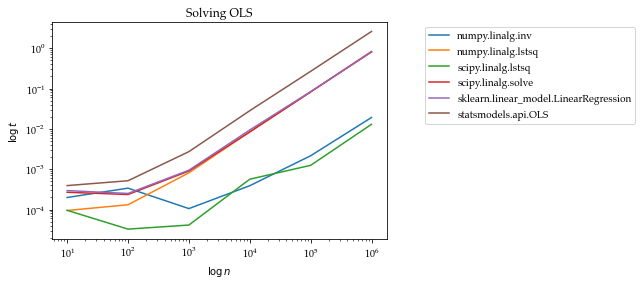

In [8]:
p=8     # dimension of feature
b = np.random.randn(p) # weight
n_grid = np.array([10**i for i in range(1, 7)])
fs = [betahat_inv, betahat_np_lstsq, 
      betahat_sci_solve, betahat_sci_lstsq, 
      betahat_sk, betahat_smols]
times = np.zeros((len(fs), len(n_grid)))

labels = [r'numpy.linalg.inv',  r'numpy.linalg.lstsq', r'scipy.linalg.lstsq',
          r'scipy.linalg.solve', r'sklearn.linear_model.LinearRegression', r'statsmodels.api.OLS']
for i, f in enumerate(fs):
    for j, n in enumerate(n_grid):
        X = np.random.randn(n,p)
        y = X @ b + np.random.randn(n)
        times[i, j] = timing(f, X, y)
    plt.plot(n_grid, times[i], label=labels[i])

plt.legend(bbox_to_anchor=(1.1, 1))
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\log{n}$")
plt.ylabel(r"$\log{t}$")
plt.title("Solving OLS")
plt.show()

Error may come from:

- Singular Matrix: A square matrix (m = n) that is not invertible is called singular or degenerate.

- ill-conditioned matrix

    If the condition number is very large, then the matrix is said to be ill-conditioned. 
    
    Practically, such a matrix is almost singular, and the computation of its inverse, or solution of a linear system of equations is prone to large numerical errors. 
    
    A matrix that is not invertible has condition number equal to infinity.